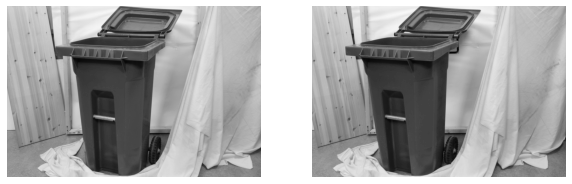

In [77]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


imgL = cv2.imread('Recycle-perfect/im0.png', cv2.IMREAD_GRAYSCALE)
imgR = cv2.imread('Recycle-perfect/im1.png', cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 2, 1)
plt.imshow(imgL, cmap='gray')
plt.axis('off')
fig.add_subplot(1, 2, 2)
plt.imshow(imgR, cmap='gray')
plt.axis('off')
plt.show()

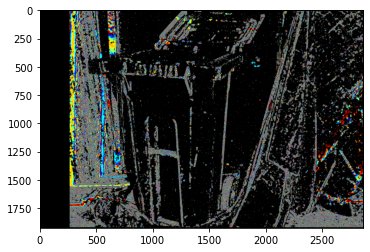

In [78]:
# calculate disparity map using the block matching algorithm
fx = 2945.377        # lense focal length
baseline = 178.232  # distance in mm between the two cameras
disparities = 256   # num of disparities to consider
block = 15          # block size to match
units = 0.001       # depth units

sbm = cv2.StereoBM_create(numDisparities=disparities, blockSize=block)
disp = sbm.compute(imgL, imgR)

# calculate depth data
depth = np.zeros(shape=imgL.shape).astype('uint8')
depth[disp > 0] = (fx * baseline) / (units * disp[disp > 0])

# visualize depth data
depth = cv2.equalizeHist(depth)
colorized_depth = np.zeros((imgL.shape[0], imgL.shape[1], 3), dtype="uint8")
temp = cv2.applyColorMap(depth, cv2.COLORMAP_JET)
colorized_depth[disp > 0] = temp[disp > 0]
plt.imshow(colorized_depth)
plt.show()